<a href="https://colab.research.google.com/github/Twixii99/Machine-Learning-problems/blob/main/New_York_City_Airbnb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import used Packages

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preparation

In [101]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv -O 'New York City Airbnb2.csv'

--2021-09-28 15:02:12--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘New York City Airbnb2.csv’

New York City Airbn 100%[===================>]   6.75M  --.-KB/s    in 0.08s   

2021-09-28 15:02:12 (83.6 MB/s) - ‘New York City Airbnb2.csv’ saved [7077973/7077973]



In [102]:
used_cols = ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df = pd.read_csv('New York City Airbnb2.csv', usecols=used_cols).fillna(0)
df.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [103]:
for col in df[df.dtypes[df.dtypes == object].index.to_list()]:
  df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,40.64749,-73.97237,private_room,149,1,9,0.21,6,365
1,manhattan,40.75362,-73.98377,entire_home/apt,225,1,45,0.38,2,355
2,manhattan,40.80902,-73.94190,private_room,150,3,0,0.00,1,365
3,brooklyn,40.68514,-73.95976,entire_home/apt,89,1,270,4.64,1,194
4,manhattan,40.79851,-73.94399,entire_home/apt,80,10,9,0.10,1,0


# Question 1

## Part 1

In [104]:
# first meathod
df.describe(include='O')

,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,manhattan,entire_home/apt
freq,21661,25409


In [105]:
# Second meathod
df.neighbourhood_group.value_counts().sort_values(ascending=False).index[0]

'manhattan'

In [106]:
# third method
df.neighbourhood_group.mode()

0    manhattan
dtype: object

## Part 2

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
df_train_validate, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
df_train, df_validate = train_test_split(df_train_validate, test_size=0.25, shuffle=True, random_state=42)

In [109]:
assert(len(df_train) + len(df_validate) == len(df_train_validate))
assert(len(df_train) + len(df_validate) + len(df_test) == len(df))
len(df_train), len(df_validate), len(df_test)

(29337, 9779, 9779)

In [110]:
df_train = df_train.reset_index(drop=True)
df_validate = df_validate.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [111]:
y_train = df_train.price
y_validate = df_validate.price
y_test = df_test.price

del df_train['price']
del df_validate['price']
del df_test['price']

# Question2

In [112]:
numerical = df_train[df_train.dtypes[df_train.dtypes != object].index.to_list()]
numerical.dtypes

latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [113]:
from IPython.display import display

In [114]:
# Trivial solution
for col in numerical.columns:
  print("COL: ", col)
  display(numerical.corrwith(numerical[col]))
  print()
  print()

COL:  latitude


latitude                          1.000000
longitude                         0.080301
minimum_nights                    0.027441
number_of_reviews                -0.006246
reviews_per_month                -0.007159
calculated_host_listings_count    0.019375
availability_365                 -0.005891
dtype: float64



COL:  longitude


latitude                          0.080301
longitude                         1.000000
minimum_nights                   -0.060660
number_of_reviews                 0.055084
reviews_per_month                 0.134642
calculated_host_listings_count   -0.117041
availability_365                  0.083666
dtype: float64



COL:  minimum_nights


latitude                          0.027441
longitude                        -0.060660
minimum_nights                    1.000000
number_of_reviews                -0.076020
reviews_per_month                -0.120703
calculated_host_listings_count    0.118647
availability_365                  0.138901
dtype: float64



COL:  number_of_reviews


latitude                         -0.006246
longitude                         0.055084
minimum_nights                   -0.076020
number_of_reviews                 1.000000
reviews_per_month                 0.590374
calculated_host_listings_count   -0.073167
availability_365                  0.174477
dtype: float64



COL:  reviews_per_month


latitude                         -0.007159
longitude                         0.134642
minimum_nights                   -0.120703
number_of_reviews                 0.590374
reviews_per_month                 1.000000
calculated_host_listings_count   -0.048767
availability_365                  0.165376
dtype: float64



COL:  calculated_host_listings_count


latitude                          0.019375
longitude                        -0.117041
minimum_nights                    0.118647
number_of_reviews                -0.073167
reviews_per_month                -0.048767
calculated_host_listings_count    1.000000
availability_365                  0.225913
dtype: float64



COL:  availability_365


latitude                         -0.005891
longitude                         0.083666
minimum_nights                    0.138901
number_of_reviews                 0.174477
reviews_per_month                 0.165376
calculated_host_listings_count    0.225913
availability_365                  1.000000
dtype: float64

In [115]:
# Already implemented solution
correlation_matrix = numerical.corr()
correlation_matrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


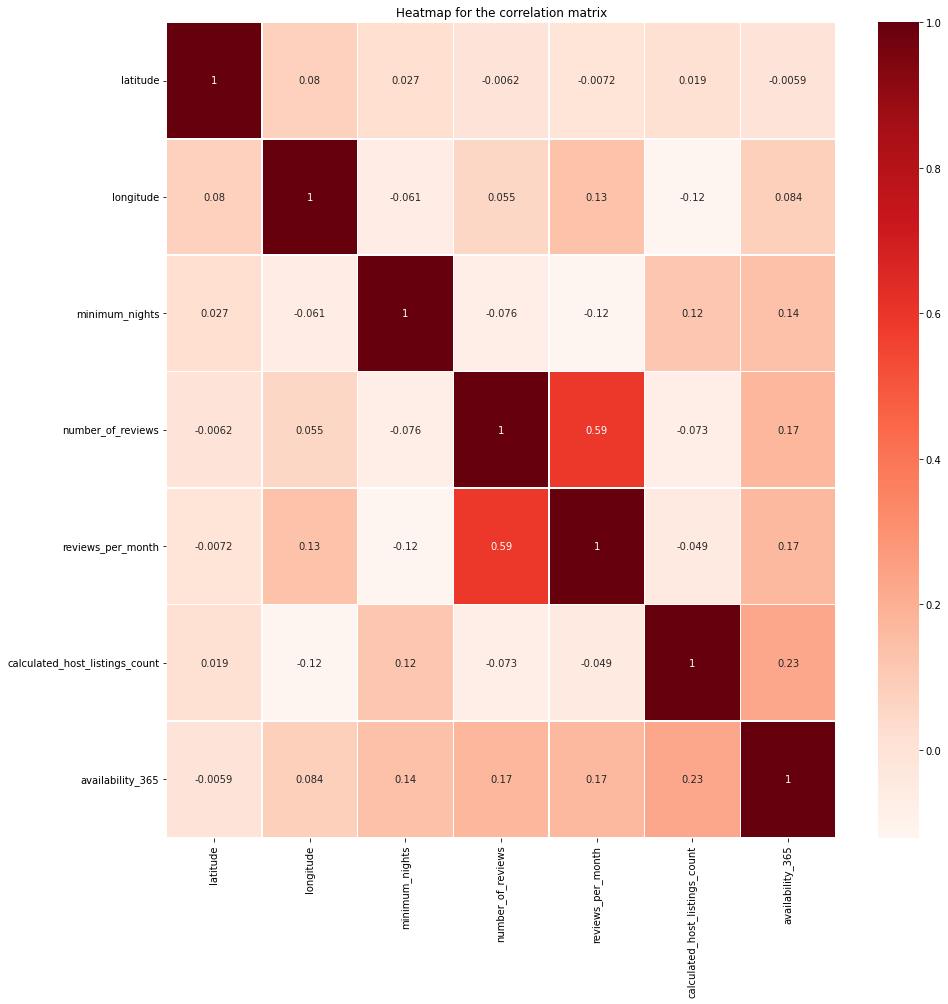

In [116]:
# graph method
fig = plt.figure(figsize=(15,15))
sns.heatmap(numerical.corr(),annot=True,linewidths=0.5, cmap="Reds")
plt.title("Heatmap for the correlation matrix")
plt.show()

In [117]:
numerical.corr().unstack().sort_values(ascending=False)

availability_365                availability_365                  1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
longitude                       longitude                         1.000000
minimum_nights                  minimum_nights                    1.000000
reviews_per_month               reviews_per_month                 1.000000
number_of_reviews               number_of_reviews                 1.000000
latitude                        latitude                          1.000000
number_of_reviews               reviews_per_month                 0.590374
reviews_per_month               number_of_reviews                 0.590374
calculated_host_listings_count  availability_365                  0.225913
availability_365                calculated_host_listings_count    0.225913
                                number_of_reviews                 0.174477
number_of_reviews               availability_365                  0.174477
reviews_per_month        

In [118]:
# that's for tha already implemented cell.
max_val = 1e-6
for col in correlation_matrix.columns:
  temp = correlation_matrix[col].nlargest(2)[1]
  if max_val <= temp:
    max_val = temp
    max_col = col
  
print(max_col.upper(), "has",  round(max_val, 2))

REVIEWS_PER_MONTH has 0.59


In [119]:
# Converting prices into boolean data.
threshold = 152
y_train_bool = (y_train >= threshold).astype(int)
y_validate_bool = (y_validate >= threshold).astype(int)
y_test_bool = (y_test >= threshold).astype(int)
df_train_validate['price'] = (df_train_validate['price'] >= threshold).astype(int)

In [120]:
assert(df_train_validate.price.value_counts()[0] == y_train_bool.value_counts()[0] + y_validate_bool.value_counts()[0])
assert(df_train_validate.price.value_counts()[1] == y_train_bool.value_counts()[1] + y_validate_bool.value_counts()[1])

# Question 3

In [121]:
categorical = df_train.dtypes[df_train.dtypes == object].index.to_list()
categorical

['neighbourhood_group', 'room_type']

In [122]:
from sklearn.metrics import mutual_info_score

In [123]:
def mutual_information(series):
  return mutual_info_score(series, y_train_bool)

In [124]:
df_train[categorical].apply(mutual_information).sort_values(ascending=False).round(2)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

# Question 4

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [126]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_validate = dv.transform(df_validate.to_dict(orient='records'))

In [127]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42).fit(X_train, y_train_bool)

In [128]:
prediction = model.predict_proba(X_validate)
decision = (prediction[:,1] >= 0.5).astype(int)

In [129]:
global_accurecy = (decision == y_validate_bool).mean().round(2)
global_accurecy

0.79

# Question 5

In [130]:
temp = {}
for i, col in enumerate(df_train.columns.to_list()):
  df_train_temp = df_train[df_train.columns.delete(i)]
  df_validate_temp = df_validate[df_validate.columns.delete(i)]
  dv=DictVectorizer(sparse=False)
  X_train_temp = dv.fit_transform(df_train_temp.to_dict(orient='records'))
  X_validate_temp = dv.transform(df_validate_temp.to_dict(orient='records'))
  model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42).fit(X_train_temp, y_train_bool)
  prediction = model.predict_proba(X_validate_temp)
  decision = (prediction[:,1] >= 0.5).astype(int)
  temp[col] = global_accurecy - (decision == y_validate_bool).mean()

In [131]:
ans = {}
ans['neighbourhood_group'] = temp['neighbourhood_group']
ans['room_type'] = temp['room_type']
ans['number_of_reviews'] = temp['number_of_reviews']
ans['reviews_per_month'] = temp['reviews_per_month']

In [132]:
temp

{'availability_365': 0.008427242049289352,
 'calculated_host_listings_count': 0.0033142448103078426,
 'latitude': 0.003621024644646753,
 'longitude': 0.0032119848655282057,
 'minimum_nights': 0.004439104202883737,
 'neighbourhood_group': 0.03900296553839866,
 'number_of_reviews': 0.003007464975968932,
 'reviews_per_month': 0.004950403926781921,
 'room_type': 0.07346456692913395}

In [133]:
sorted(ans.values())

[0.003007464975968932,
 0.004950403926781921,
 0.03900296553839866,
 0.07346456692913395]

# Question. 6

In [134]:
from sklearn.linear_model import Ridge

In [135]:
y_train_log = np.log1p(y_train)
y_validate_log = np.log1p(y_validate)
y_test_log = np.log1p(y_test)
y_train_log.isnull().value_counts()

False    29337
Name: price, dtype: int64

In [136]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [137]:
values = []
for i in [0, 0.01, 0.1, 1, 10]:
  rmodel = Ridge(alpha=i)
  rmodel.fit(X_train, y_train_log)
  values.append(round(rmse(rmodel.predict(X_validate), y_validate_log), 3))

In [138]:
values

[0.497, 0.497, 0.497, 0.497, 0.498]

In [139]:
min(values)

0.497